  # Call Center Analysis

This Jupyter notebook explores a company's marketing call center data to extract insights on leads, signups, and regions with most promising conversion patterns. 

* **Part 1: Data Processing**: understanding the dataset and merging the datasets.

    -  Packages and Data Upload
    -  Understanding the Calls dataset
    -  Understanding the Leads dataset
    -  Understanding the Signups dataset
    -  Merging the datasets 
* **Part 2: Metrics**: defining metrics and extracting insights. 

# Part 1: Data Processing

In this part, I process the information across the entirety of the dataset. I begin by understanding the dataset and its contents on a high level by implementing seaborn's heatmap capacities, and cleaning where necessary. 

**Packages and Data Upload**

In [1]:
# Numerical packages

import pandas as pd
import numpy as np

In [2]:
# Plotting packages

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Inline call

%matplotlib inline

In [4]:
# Data Upload

calls_data = pd.read_csv('calls.csv')
leads_data = pd.read_csv('leads.csv')
signups_data = pd.read_csv('signups.csv')

**Understanding the Calls dataset**

In [5]:
# Understanding the content of each column in the dataset

calls_data.head()

,Phone Number,Call Outcome,Agent,Call Number
0,6412714192,NOT INTERESTED,black,0
1,2878259249,ANSWER MACHINE,red,1
2,5762800010,INTERESTED,red,2
3,9742942608,ANSWER MACHINE,orange,3
4,5053320104,INTERESTED,orange,4


In [6]:
# Understanding the type of data in each column in the dataset

calls_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
Phone Number    10000 non-null int64
Call Outcome    10000 non-null object
Agent           10000 non-null object
Call Number     10000 non-null int64
dtypes: int64(2), object(2)
memory usage: 312.6+ KB


*Note*: This dataset has 10,000 entries. 

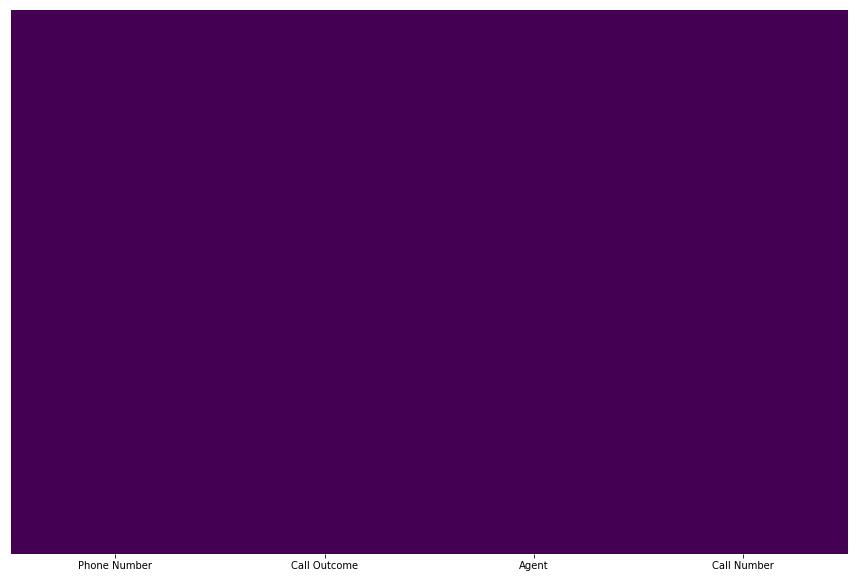

In [7]:
# Checking for presence of null values in each column, where purple = data and yellow = NULL

fig, ax = plt.subplots(figsize = (15,10))
sns.heatmap(calls_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

   *Interpretation*: No null values in this dataset.

In [8]:
# Understanding the unique values of each nominal categorical column

print(calls_data['Call Outcome'].unique())
print('')
print(calls_data['Agent'].unique())
print('')

['NOT INTERESTED' 'ANSWER MACHINE' 'INTERESTED' 'CALL BACK LATER'
 'DEAD LINE']

['black' 'red' 'orange' 'green' 'blue']



*Interpretation*: We have five categorical values in each of these columns.

**Understanding the Leads dataset**

In [9]:
# Understanding the content of each column in the dataset

leads_data.head()

,Name,Phone Number,Region,Sector,Age
0,Camron MORA,7740561309,south-west,retail,66
1,Mohamed MATHEWS,6521342149,midlands,entertainment,51
2,Will SMITH,6391051549,south-west,retail,30
3,Eden REESE,4867138529,north-east,retail,59
4,Alva MORAN,471250244,south,retail,55


In [10]:
# Understanding the type of data in each column in the dataset

leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19964 entries, 0 to 19963
Data columns (total 5 columns):
Name            19964 non-null object
Phone Number    19964 non-null int64
Region          19964 non-null object
Sector          19964 non-null object
Age             19964 non-null int64
dtypes: int64(2), object(3)
memory usage: 779.9+ KB


*Note*: This dataset has 19,664 entries. This means 19,664 leads were fed into the call system, but not everyone was actually called based on the 10,000 calls in the calls dataset.

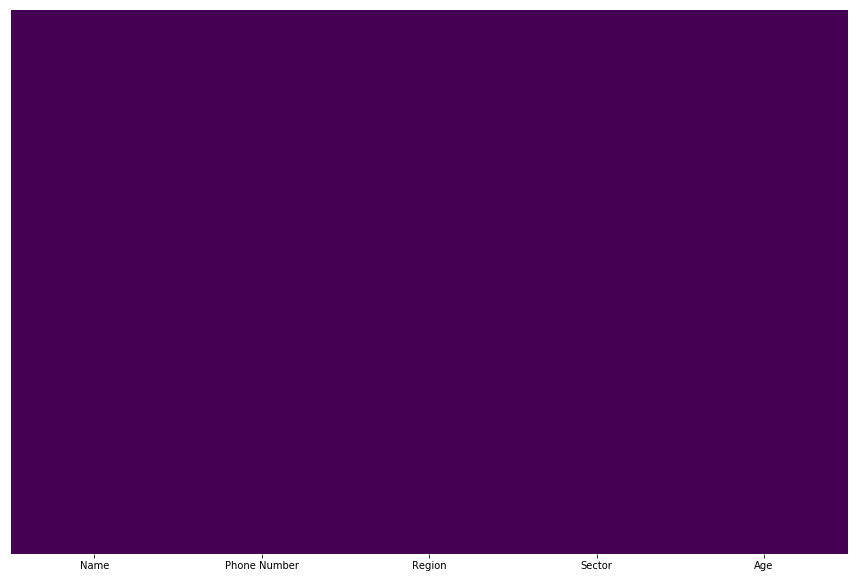

In [11]:
# Checking for presence of null values in each columns, where purple = data and yellow = NULL

fig, ax = plt.subplots(figsize = (15,10))
sns.heatmap(leads_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

*Interpretation*: Dataset is completely full with no missing values. 

In [12]:
# Understanding the unique values of each nominal categorical column

print(leads_data['Region'].unique())
print('')
print(leads_data['Sector'].unique())
print('')

['south-west' 'midlands' 'north-east' 'south' 'north-west' 'scotland'
 'south-east' 'wales' 'london' 'northern-ireland']

['retail' 'entertainment' 'wholesale' 'food' 'construction' 'agriculture'
 'consultancy']



**Understanding the Signups dataset**

In [13]:
# Understanding the content of each column in the dataset

signups_data.head()

,Lead,Approval Decision
0,Liddie CHEN,APPROVED
1,Ariel CAREY,REJECTED
2,Rylie WALSH,APPROVED
3,Aurelia RODRIGUEZ,REJECTED
4,Jaycee GOLDEN,APPROVED


In [14]:
# Understanding the type of data in each column in the dataset

signups_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1506 entries, 0 to 1505
Data columns (total 2 columns):
Lead                 1506 non-null object
Approval Decision    1506 non-null object
dtypes: object(2)
memory usage: 23.6+ KB


*Note*: This dataset has 1,506 entries. This means, after all the calls, there was a total of 1,506 signups. 

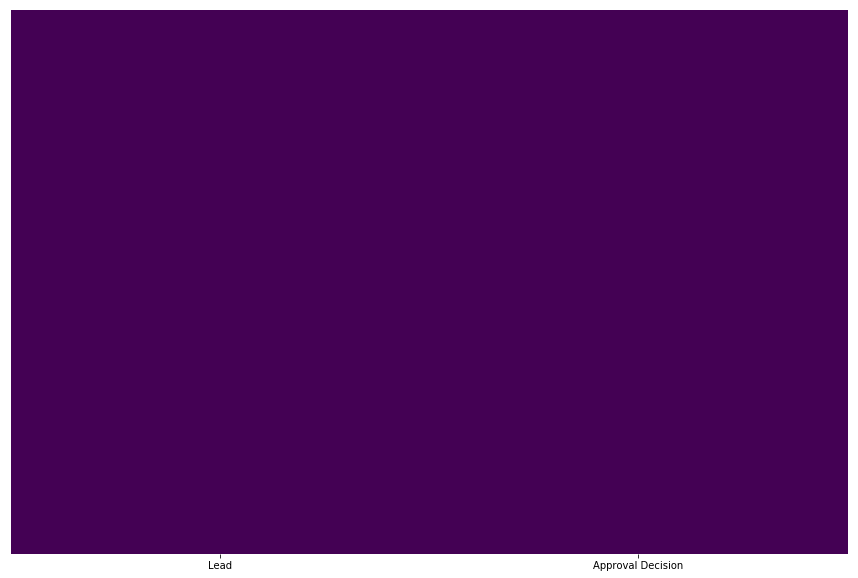

In [15]:
# Checking for presence of null values in each columns, where purple = data and yellow = NULL

fig, ax = plt.subplots(figsize = (15,10))
sns.heatmap(signups_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

*Interpretation*: Dataset is completely full with no missing values. 

In [16]:
# Understanding the unique values of each nominal categorical column

print(signups_data['Approval Decision'].unique())
print('')

['APPROVED' 'REJECTED']



*Interpretation*: Only two target categories, Approved and Rejected. We can interpret this as a Bernoulli trial, with 'Approved' treated as success (1), and 'Rejected' as failure (0).

**Merging the datasets**

Our main dataset is 'calls' as it contains the information on contacted leads, so we'll be joining the other datasets on this primary frame.

In [17]:
# Merging the datasets on first join:

data_interim = calls_data.merge(leads_data, how = 'left', on ='Phone Number')

In [18]:
data_interim.head()

,Phone Number,Call Outcome,Agent,Call Number,Name,Region,Sector,Age
0,6412714192,NOT INTERESTED,black,0,Autumn DAVIS,south,entertainment,48
1,2878259249,ANSWER MACHINE,red,1,Henry MILLER,wales,retail,59
2,5762800010,INTERESTED,red,2,Liddie CHEN,south-west,retail,21
3,9742942608,ANSWER MACHINE,orange,3,Alyson YU,north-west,wholesale,72
4,5053320104,INTERESTED,orange,4,Ariel CAREY,north-west,construction,35


In [19]:
# Before the second merge, we'll change the name of the Name column to Lead for joining purposes.

data_interim = data_interim.rename({'Name':'Lead'}, axis='columns')

In [20]:
data_interim.head()

,Phone Number,Call Outcome,Agent,Call Number,Lead,Region,Sector,Age
0,6412714192,NOT INTERESTED,black,0,Autumn DAVIS,south,entertainment,48
1,2878259249,ANSWER MACHINE,red,1,Henry MILLER,wales,retail,59
2,5762800010,INTERESTED,red,2,Liddie CHEN,south-west,retail,21
3,9742942608,ANSWER MACHINE,orange,3,Alyson YU,north-west,wholesale,72
4,5053320104,INTERESTED,orange,4,Ariel CAREY,north-west,construction,35


In [21]:
# Second merge

data_merged = data_interim.merge(signups_data, how = 'left', on ='Lead') 

In [22]:
data_merged.head()

,Phone Number,Call Outcome,Agent,Call Number,Lead,Region,Sector,Age,Approval Decision
0,6412714192,NOT INTERESTED,black,0,Autumn DAVIS,south,entertainment,48,NaN
1,2878259249,ANSWER MACHINE,red,1,Henry MILLER,wales,retail,59,NaN
2,5762800010,INTERESTED,red,2,Liddie CHEN,south-west,retail,21,APPROVED
3,9742942608,ANSWER MACHINE,orange,3,Alyson YU,north-west,wholesale,72,NaN
4,5053320104,INTERESTED,orange,4,Ariel CAREY,north-west,construction,35,REJECTED


In [23]:
# Understanding the type of data in each column in the merged dataset

data_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 9 columns):
Phone Number         10000 non-null int64
Call Outcome         10000 non-null object
Agent                10000 non-null object
Call Number          10000 non-null int64
Lead                 10000 non-null object
Region               10000 non-null object
Sector               10000 non-null object
Age                  10000 non-null int64
Approval Decision    3348 non-null object
dtypes: int64(3), object(6)
memory usage: 781.2+ KB


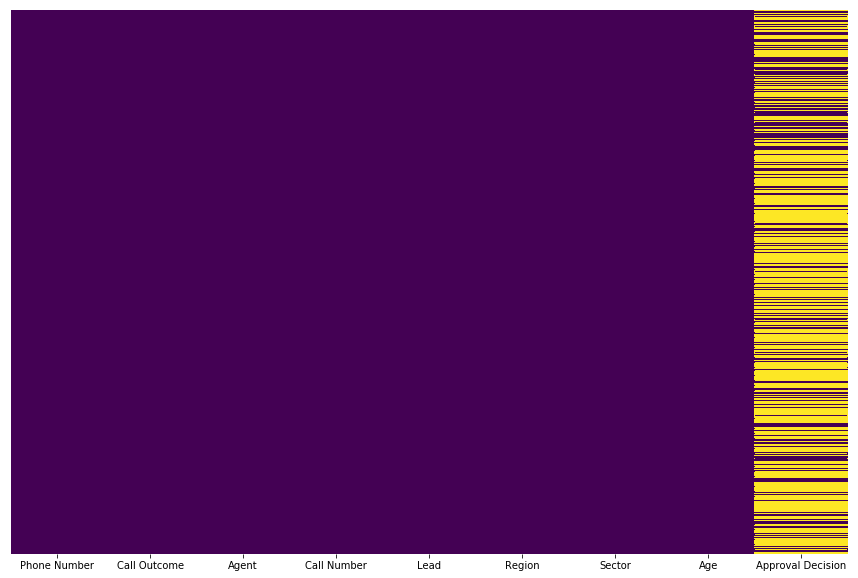

In [24]:
# Checking for presence of null values in each columns, where purple = data and yellow = NULL

fig, ax = plt.subplots(figsize = (15,10))
sns.heatmap(data_merged.isnull(), yticklabels=False, cbar=False, cmap='viridis')

*Interpretation*: All data fields are filled except for the 'Approval Decision' category, which mostly contains null values. Essentially, this means that some leads that were contacted never signed up. 

# Part 2: Metrics

## Basics

**Calls per agent**

Let's start from the basics: how many calls did each agent make in the call center? We can use this to measure their success of signups by using the number of calls for normalization. 

In [25]:
# Renaming the Phone Number column for syntax processing purposes

data_merged = data_merged.rename({'Phone Number':'phone_number'}, axis='columns')

In [26]:
# Getting the number of calls per agent

calls_per_agent = data_merged.groupby('Agent').phone_number.count()

In [27]:
calls_per_agent

Agent
black     1470
blue       366
green      763
orange    4406
red       2995
Name: phone_number, dtype: int64

The numbers above represent the number of calls for each agent. We can see that agent *orange* had the highest number of calls, while agent *blue* had the lowest number of calls. 

**Signups per agent**

Now, let's take a look how many signups each agent had. The tricky part here is that there is always a possibility of one lead having been contacted by multiple agents. For purposes of this analysis, we will assign a successful signup to the last agent that made the call to a lead. 

In [28]:
# Let's see how many entries we have in the data_interim dataset before removing duplicates: all calls for a lead
# before the last one. 

len(data_interim)

10000

In [29]:
# We will first remove duplicate leads from the data_interim dataset, keeping only the last occurrences of a lead call.
# We keep the last occurrence so that we can identify the last agent that contacted the lead. 

data_interim_cleaned = data_interim.drop_duplicates('Lead', keep = 'last')

In [30]:
data_interim_cleaned.head()

,Phone Number,Call Outcome,Agent,Call Number,Lead,Region,Sector,Age
0,6412714192,NOT INTERESTED,black,0,Autumn DAVIS,south,entertainment,48
2,5762800010,INTERESTED,red,2,Liddie CHEN,south-west,retail,21
4,5053320104,INTERESTED,orange,4,Ariel CAREY,north-west,construction,35
7,2880720829,NOT INTERESTED,red,7,Mabel ASHLEY,south,retail,20
8,5940892214,NOT INTERESTED,black,8,Yareli WALTON,midlands,retail,25


In [31]:
data_interim_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5166 entries, 0 to 9999
Data columns (total 8 columns):
Phone Number    5166 non-null int64
Call Outcome    5166 non-null object
Agent           5166 non-null object
Call Number     5166 non-null int64
Lead            5166 non-null object
Region          5166 non-null object
Sector          5166 non-null object
Age             5166 non-null int64
dtypes: int64(3), object(5)
memory usage: 363.2+ KB


In [32]:
# Let's check the length of the entire cleaned dataset.

len(data_interim_cleaned)

5166

In [33]:
# Let's check how many unique leads we have in the cleaned dataset.

len(data_interim_cleaned['Lead'].unique())

5166

The length of the cleaned dataset is equal to the length of unique lead names, which means the cleanup process was successful and we have identified unique last occurrences of an agent call for each lead. 

In [34]:
# Now, we will do an inner join on the signups dataset to expand information for each signup. 

expanded_signups = signups_data.merge(data_interim_cleaned, how = 'inner', on = 'Lead')

In [35]:
expanded_signups.head()

,Lead,Approval Decision,Phone Number,Call Outcome,Agent,Call Number,Region,Sector,Age
0,Liddie CHEN,APPROVED,5762800010,INTERESTED,red,2,south-west,retail,21
1,Ariel CAREY,REJECTED,5053320104,INTERESTED,orange,4,north-west,construction,35
2,Rylie WALSH,APPROVED,9968931392,INTERESTED,green,29,north-west,retail,21
3,Aurelia RODRIGUEZ,REJECTED,1905656511,INTERESTED,red,30,south-east,consultancy,31
4,Jaycee GOLDEN,APPROVED,6109626331,INTERESTED,black,4419,scotland,wholesale,42


In [36]:
expanded_signups.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1506 entries, 0 to 1505
Data columns (total 9 columns):
Lead                 1506 non-null object
Approval Decision    1506 non-null object
Phone Number         1506 non-null int64
Call Outcome         1506 non-null object
Agent                1506 non-null object
Call Number          1506 non-null int64
Region               1506 non-null object
Sector               1506 non-null object
Age                  1506 non-null int64
dtypes: int64(3), object(6)
memory usage: 117.7+ KB


We can see that we have 1,506 entries, which is equal to the actual number of total signups. This means the merging was correct. 

In [37]:
# Renaming the Approval Decision column for syntax processing purposes

expanded_signups = expanded_signups.rename({'Approval Decision':'approval_decision'}, axis='columns')

In [38]:
# We can now count the number of signups per each agent (by counting entries in the Lead column) because every
# lead is assigned a unique agent after removing duplicates and merging the cleaned data_interim dataset. 

signups_per_agent = expanded_signups.groupby('Agent').Lead.count()

In [39]:
signups_per_agent

Agent
black     106
blue       95
green     134
orange    594
red       577
Name: Lead, dtype: int64

The numbers above show the number of signups for each agent. Agent *red* had the highest number of signups, while agent *blue* had the lowest. Now, we need to normalize this metric using the total number of calls and see how agents compare in terms of number of signups per call.  

**Normalization: Signups per call**

In [40]:
# To extract these numbers, we will implement the formula:

# signups_per_call_per_agent = (signups_per_agent) / (calls_per_agent)

from __future__ import division

In [41]:
# Implementing the fomula

signups_per_call_per_agent = signups_per_agent / calls_per_agent

In [42]:
signups_per_call_per_agent

Agent
black     0.072109
blue      0.259563
green     0.175623
orange    0.134816
red       0.192654
dtype: float64

We can see that agent *blue* had the highest number of signups per call: approximately 0.26 (which we can interpret as a 26% conversion rate), while agent *black* had the lowest number of signups per call (7.2% conversion rate). 

## Statistics on leads and signups 

### **Number of calls necessary to get a lead interested**

One question we could ask is: how many calls on average did an agent make to get a lead interested? 

In this part, I will first identify all the leads that said they were interested at some point. I will then find those leads and all their associated calls. After that, I will trace the number of calls until the one that got the lead interested and calculate these basic descriptive statisical measures. A crucial assumption here is that 'Interested' is always the last stage in the process; that is, I will assume that, once a lead expresses an interest, the agents do not make any additional calls, leading to people potentially losing interest.

In [43]:
# We will first extract a temporary dataset of only interested leads:

interested = data_merged[data_merged['Call Outcome'] == 'INTERESTED']

In [44]:
interested.head()

,phone_number,Call Outcome,Agent,Call Number,Lead,Region,Sector,Age,Approval Decision
2,5762800010,INTERESTED,red,2,Liddie CHEN,south-west,retail,21,APPROVED
4,5053320104,INTERESTED,orange,4,Ariel CAREY,north-west,construction,35,REJECTED
6,5917627210,INTERESTED,red,6,Cody MASSEY,south-east,food,25,APPROVED
29,9968931392,INTERESTED,green,29,Rylie WALSH,north-west,retail,21,APPROVED
30,1905656511,INTERESTED,red,30,Aurelia RODRIGUEZ,south-east,consultancy,31,REJECTED


In [45]:
# Number of unique interested leads

len(interested['Lead'].unique())

2457

2457 unique leads expressed interested.

In [46]:
# Renaming the Call Outcome column for syntax processing purposes

data_merged = data_merged.rename({'Call Outcome':'call_outcome'}, axis='columns')

In [47]:
# Now let's check calls for these leads that had other categories other than Interested 
# therefore showing us how many other calls happened for that lead before they were interested.

# First, let's retrace all the leads that were interested along with their other outcomes instead of just Interested.

before = data_merged[data_merged.Lead.isin(interested['Lead'])]

In [48]:
before.head()

,phone_number,call_outcome,Agent,Call Number,Lead,Region,Sector,Age,Approval Decision
1,2878259249,ANSWER MACHINE,red,1,Henry MILLER,wales,retail,59,NaN
2,5762800010,INTERESTED,red,2,Liddie CHEN,south-west,retail,21,APPROVED
4,5053320104,INTERESTED,orange,4,Ariel CAREY,north-west,construction,35,REJECTED
6,5917627210,INTERESTED,red,6,Cody MASSEY,south-east,food,25,APPROVED
9,2263150191,CALL BACK LATER,green,9,Shana MORENO,north-west,retail,54,NaN


In [49]:
len(before['Lead'].unique())

2457

The number is still correct: 2457 unique leads who expressed interest, but now we also have all the other calls that were directed to them before they were marked as interested.

In [50]:
# And, now, we will count the number of calls per lead since all the calls will represent other Call Outcome categories as well,
# thereby automatically denoting the number of calls per lead before they were classified as interested.

before.groupby('Lead').call_outcome.count()

Lead
Abagail FERGUSON     1
Abagail POWELL       2
Abbigail WOODARD     3
Abdul FOSTER         2
Abigayle PONCE       4
Abram MCCANN         4
Acie HOLMES          3
Ada BUTLER           4
Ada WHEELER          2
Adaline MOLINA       2
Adam BRUCE           4
Adan VARGAS          2
Addie RUSSO          2
Addie YOUNG          2
Addison LAM          2
Addison NORMAN       2
Addison NORTON       2
Adelina TAYLOR       6
Adeline BOYD         1
Adella BENTON        1
Adella GORDON        1
Aden WATTS           2
Adria HENRY          2
Adrian DOUGLAS       2
Adrian RANDALL       2
Adrianne BAIRD       2
Adrienne BENTLEY     2
Adrienne GARNER      2
Afton DELACRUZ       4
Agatha MORAN         5
                    ..
Yazmin YODER         1
Yessenia HENSON      2
Yetta HOOD           1
Yolanda WRIGHT       3
Yolonda GILLESPIE    1
Yoshiko HATFIELD     2
Yuliana HUNT         2
Yuliana LAWRENCE     1
Yusuf CALLAHAN       2
Yusuf GAY            1
Yusuf JOYCE          1
Yvonne LESTER        2
Zackar

In [51]:
# Mean

round(np.mean(before.groupby('Lead').call_outcome.count()),3)

2.17

The mean number of calls before a lead was marked as interested was 2.17.

In [52]:
# Median

round(np.median(before.groupby('Lead').call_outcome.count()),3)

2.0

The median was 2.

From a common-sense perspective, these numbers make sense. We can envision a situation in which a lead is unreachable at first or expresses potential interest, leading the center agents to call again. Any additional calls are likely to be seen as annoyance, so an average of two calls per person seems like a resonable statistic. 

**Most promising regions to express interest**

Of course, we also might want to know which regions are most likely to express interest. We can figure out those numbers by implementing the analysis as follows:

In [53]:
# Let's once again refer to the "interested" dataset, that contains all interested leads.

interested.head()

,phone_number,Call Outcome,Agent,Call Number,Lead,Region,Sector,Age,Approval Decision
2,5762800010,INTERESTED,red,2,Liddie CHEN,south-west,retail,21,APPROVED
4,5053320104,INTERESTED,orange,4,Ariel CAREY,north-west,construction,35,REJECTED
6,5917627210,INTERESTED,red,6,Cody MASSEY,south-east,food,25,APPROVED
29,9968931392,INTERESTED,green,29,Rylie WALSH,north-west,retail,21,APPROVED
30,1905656511,INTERESTED,red,30,Aurelia RODRIGUEZ,south-east,consultancy,31,REJECTED


In [54]:
# Let's make sure to remove duplicates of the interested ones, in case such exist:

interested_cleaned = interested.drop_duplicates('Lead', keep = 'last')

In [55]:
interested_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2457 entries, 2 to 9998
Data columns (total 9 columns):
phone_number         2457 non-null int64
Call Outcome         2457 non-null object
Agent                2457 non-null object
Call Number          2457 non-null int64
Lead                 2457 non-null object
Region               2457 non-null object
Sector               2457 non-null object
Age                  2457 non-null int64
Approval Decision    1506 non-null object
dtypes: int64(3), object(6)
memory usage: 192.0+ KB


As can be seen, every interested lead was a unique lead, so no duplicates existed. 

In [56]:
interest_per_region = interested.groupby('Region').Lead.count()

In [57]:
interest_per_region

Region
london              128
midlands            333
north-east          292
north-west          763
northern-ireland     75
scotland            309
south               131
south-east          324
south-west          364
wales               121
Name: Lead, dtype: int64

Out of all the leads expressing interest, *north-west* region had the highest number of interested leads. This is an absolute number, however, and shows only which region will have the highest number of interested leads *out of leads that express interest*. We will now look how likely a lead will express interest based on all leads per region -- in other words, we will normalize once again. 

In [58]:
# To get a proportion of leads expressing interest per region, we need to find leads per region that did not express interest. 

no_interest = data_merged[data_merged.Lead.isin(interested['Lead']) == False]

In [59]:
no_interest.head()

,phone_number,call_outcome,Agent,Call Number,Lead,Region,Sector,Age,Approval Decision
0,6412714192,NOT INTERESTED,black,0,Autumn DAVIS,south,entertainment,48,NaN
3,9742942608,ANSWER MACHINE,orange,3,Alyson YU,north-west,wholesale,72,NaN
5,5829556629,ANSWER MACHINE,red,5,Adaline SCHMIDT,north-east,retail,33,NaN
7,2880720829,NOT INTERESTED,red,7,Mabel ASHLEY,south,retail,20,NaN
8,5940892214,NOT INTERESTED,black,8,Yareli WALTON,midlands,retail,25,NaN


In [60]:
no_interest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4669 entries, 0 to 9999
Data columns (total 9 columns):
phone_number         4669 non-null int64
call_outcome         4669 non-null object
Agent                4669 non-null object
Call Number          4669 non-null int64
Lead                 4669 non-null object
Region               4669 non-null object
Sector               4669 non-null object
Age                  4669 non-null int64
Approval Decision    0 non-null object
dtypes: int64(3), object(6)
memory usage: 364.8+ KB


In [61]:
# Let's also make sure that such leads are unique for each category

no_interest_cleaned = no_interest.drop_duplicates('Lead', keep = 'last')

In [62]:
no_interest_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2709 entries, 0 to 9999
Data columns (total 9 columns):
phone_number         2709 non-null int64
call_outcome         2709 non-null object
Agent                2709 non-null object
Call Number          2709 non-null int64
Lead                 2709 non-null object
Region               2709 non-null object
Sector               2709 non-null object
Age                  2709 non-null int64
Approval Decision    0 non-null object
dtypes: int64(3), object(6)
memory usage: 211.6+ KB


In [63]:
# Now, let's count the number of unique leads per region who didn't express interest

no_interest_per_region = no_interest_cleaned.groupby('Region').Lead.count()

In [64]:
no_interest_per_region

Region
london               42
midlands            535
north-east          320
north-west          514
northern-ireland     98
scotland            335
south               158
south-east          290
south-west          245
wales               172
Name: Lead, dtype: int64

In [65]:
# Let's get total number of unique leads per region

unique_leads_per_region = interest_per_region + no_interest_per_region

In [66]:
unique_leads_per_region

Region
london               170
midlands             868
north-east           612
north-west          1277
northern-ireland     173
scotland             644
south                289
south-east           614
south-west           609
wales                293
Name: Lead, dtype: int64

In [67]:
# Proportion of leads per region who express interest

interested_leads_per_region = interest_per_region / unique_leads_per_region

In [68]:
interested_leads_per_region

Region
london              0.752941
midlands            0.383641
north-east          0.477124
north-west          0.597494
northern-ireland    0.433526
scotland            0.479814
south               0.453287
south-east          0.527687
south-west          0.597701
wales               0.412969
Name: Lead, dtype: float64

We can see that the highest proportion of leads expressing interest belongs to the *london* region (75%). The *north-west* region, on the other hand, has approximately 60% leads expressing interest. 

**Most promising regions to get signups approved**

On a similar note, we also might want to know which regions are most likely to have signups *approved* (based on the company's internal critera). We implement the analysis as follows:

In [69]:
# Renaming the Approval Decision column for syntax processing purposes

expanded_signups = expanded_signups.rename({'Approval Decision':'approval_decision'}, axis='columns')

In [70]:
# Let's extract only approved signups:

approved_signups = expanded_signups[expanded_signups['approval_decision'] == 'APPROVED']

In [71]:
approved_signups.head()

,Lead,approval_decision,Phone Number,Call Outcome,Agent,Call Number,Region,Sector,Age
0,Liddie CHEN,APPROVED,5762800010,INTERESTED,red,2,south-west,retail,21
2,Rylie WALSH,APPROVED,9968931392,INTERESTED,green,29,north-west,retail,21
4,Jaycee GOLDEN,APPROVED,6109626331,INTERESTED,black,4419,scotland,wholesale,42
5,Armani EWING,APPROVED,5898548147,INTERESTED,red,38,scotland,consultancy,21
6,Khadijah MARKS,APPROVED,8489331514,INTERESTED,black,53,south-east,consultancy,56


In [72]:
approved_signups.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1063 entries, 0 to 1505
Data columns (total 9 columns):
Lead                 1063 non-null object
approval_decision    1063 non-null object
Phone Number         1063 non-null int64
Call Outcome         1063 non-null object
Agent                1063 non-null object
Call Number          1063 non-null int64
Region               1063 non-null object
Sector               1063 non-null object
Age                  1063 non-null int64
dtypes: int64(3), object(6)
memory usage: 83.0+ KB


In [73]:
# Let's count the number of approved signups per region

approved_per_region = approved_signups.groupby('Region').approval_decision.count()

In [74]:
approved_per_region

Region
london               24
midlands            128
north-east          102
north-west          321
northern-ireland     14
scotland            140
south                61
south-east          114
south-west          125
wales                34
Name: approval_decision, dtype: int64

As we can see, north-west gets the highest number of approved signups out of all the approved signups. Once again, we will look at the proportion of approved signups to do a normalized comparison between the regions. 

In [75]:
# Let's extract only the rejected signups per region:

rejected_signups = expanded_signups[expanded_signups['approval_decision'] == 'REJECTED']

In [76]:
rejected_signups.head()

,Lead,approval_decision,Phone Number,Call Outcome,Agent,Call Number,Region,Sector,Age
1,Ariel CAREY,REJECTED,5053320104,INTERESTED,orange,4,north-west,construction,35
3,Aurelia RODRIGUEZ,REJECTED,1905656511,INTERESTED,red,30,south-east,consultancy,31
8,Signe LUCAS,REJECTED,1483611616,INTERESTED,orange,7033,scotland,consultancy,18
10,Winifred DENNIS,REJECTED,747888557,INTERESTED,orange,121,north-east,wholesale,26
11,Jolie WOLFE,REJECTED,2990784871,INTERESTED,red,125,south-east,agriculture,18


In [77]:
rejected_signups.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443 entries, 1 to 1504
Data columns (total 9 columns):
Lead                 443 non-null object
approval_decision    443 non-null object
Phone Number         443 non-null int64
Call Outcome         443 non-null object
Agent                443 non-null object
Call Number          443 non-null int64
Region               443 non-null object
Sector               443 non-null object
Age                  443 non-null int64
dtypes: int64(3), object(6)
memory usage: 34.6+ KB


In [78]:
# Now we count the number of rejected signups per region 

rejected_per_region = rejected_signups.groupby('Region').approval_decision.count()

In [79]:
rejected_per_region

Region
london              42
midlands            67
north-east          56
north-west          81
northern-ireland    21
scotland            24
south               17
south-east          54
south-west          55
wales               26
Name: approval_decision, dtype: int64

In [80]:
# Now, let's get the total number of signups per region:

total_per_region = approved_per_region + rejected_per_region

In [81]:
total_per_region

Region
london               66
midlands            195
north-east          158
north-west          402
northern-ireland     35
scotland            164
south                78
south-east          168
south-west          180
wales                60
Name: approval_decision, dtype: int64

In [82]:
# And, finally, we extract the proportion of leads per region that get approved:

approved_proportion = approved_per_region / total_per_region

In [83]:
approved_proportion

Region
london              0.363636
midlands            0.656410
north-east          0.645570
north-west          0.798507
northern-ireland    0.400000
scotland            0.853659
south               0.782051
south-east          0.678571
south-west          0.694444
wales               0.566667
Name: approval_decision, dtype: float64

It seems that Scotland has the highest proportion of approved signups (85%). Northwest region is still on the higher end, with approximately 80% proportion of approved signups. From a proportion perspective, Scotland would be most likely to have a signup approved. 

**Uncertainty on the calculated proportion**

To finalize the previous calculation and conclude this analysis, we can also infer where the true proportion of approved signups would lie, given the data on these calls. If we treat the 'Approval Decision' variable as a binominal distribution with Bernoulli trials consisting of approved as '1' and rejected as '0', we can use the formula for confidence interval of a proportion to infer the range for true proportion. We can derive the formula as follows:

*Variance of a variable*

$
\begin{equation} 
{\sigma^2} = \frac{\sum\limits_{i=1}^n(x_i - \bar{x})}{n}
\end{equation}
$

*Defining success and failure variables*

m : number of success (approvals)

n : size of sample 

p : probability of success

*Equating probability of success with propotion of successes*

$
\begin{equation} 
{p} = \frac{m}{n}
\end{equation}
$

So, the overall mean of the sample will be $
\begin{equation} 
\frac{m}{n}
\end{equation}
$, while each data point will be either 1 (success) or 0 (failure). We know that we have $
\begin{equation} 
{m}
\end{equation}
$ successes, and $
\begin{equation} 
{n-m}
\end{equation}
$ failures. Substituting into the variance equation, we get:

$
\begin{equation} 
{\sigma^2} = \frac{m\:(1\:-\:\frac{m}{n})^2 + (n-m)\:(0\:-\:\frac{m}{n})^2}{n}
\end{equation}
$

As we substitute for probability of success, that ultimately leads us to:

$
\begin{equation} 
{\sigma^2} = p\:(1-p)
\end{equation}
$

From the variance, we can extract the standard deviation as:

$
\begin{equation} 
{\sigma} = \sqrt{p\:(1-p)}
\end{equation}
$

For a sampled distribution (since we can recognize this data as a sample of the entire population), we implement the formula for standard error:

$
\begin{equation} 
{SE} = \frac{\sigma}{\sqrt{n}}
\end{equation}
$

Substituting for the extracted standard deviation of proportion, we get that:

$
\begin{equation} 
{SE} = \sqrt{\frac{p\:(1-p)}{n}}
\end{equation}
$

Finally, using a z-statistic for samples of large size, we get the true range for the proportion of population through confidence interval:

$
\begin{equation} 
{CI} = p \: {\pm}\: z\:\sqrt{\frac{p\:(1-p)}{n}}
\end{equation}
$

where *p* is going to be the desired proportion. 

And, now, we can implement the formula:

In [84]:
# Total size of the sample

total_per_region['scotland']

164

In [85]:
# Probability of success
p = 0.853

# Assigning n as the total size of the sample

n = total_per_region['scotland']

# Calculating the standard error of the sample

standard_error_sample = np.sqrt((p*(1-p))/n)

In [86]:
round(standard_error_sample, 3)

0.028

Standard error is qual to 2.8%. For a 95% confidence interval, the z-statistic is usually 1.96, so for the sake of simplicity, let's just use 2 as the value. This will also ensure we account for higher variance since we are only looking at a sample of a population. 

In [87]:
# Assigning the z-statistic

z = 2

In [88]:
# Let's get the actual interval by calculating the marginal error

marginal_error = z*standard_error_sample

In [89]:
marginal_error

0.05530205306469853

The marginal error is equal to approximately 5.5%. 

In [90]:
# Let's get the lower and upper bound of the error

lower_bound = round(p - marginal_error, 3)
upper_bound = round(p + marginal_error, 3)

In [91]:
confidence_interval = [lower_bound, p, upper_bound]

In [92]:
confidence_interval

[0.798, 0.853, 0.908]

The lower end of the error for the proportion is 79.8% and the upper end of the error for the proportion is 90.8%, as approximated from a 95% confidence interval. 